In [1]:
import csv

data = []

with open('data.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        data.append(row)
        
print (len(data))

110528


In [25]:
# Print out header data
print (data[0])

['29872499824296', '5642903', 'F', datetime.datetime(2016, 4, 29, 18, 38, 8, tzinfo=tzutc()), datetime.datetime(2016, 4, 29, 0, 0, tzinfo=tzutc()), '62', 'JARDIM DA PENHA', '0', '1', '0', '0', '0', '0', 'No']


In [3]:
# Take out first line, since it's just the header data
data = data[1:len(data)]

In [4]:
# Split into training and testing sets

halfway = int(len(data)/2)

data_train = data[:halfway]
# We're only going to be using the training set for graphs
#data_test = data[halfway:]

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def makeplot(x,y,xlabel,ylabel):
    plt.scatter(x, y, c='blue', alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    fig_size = [10,10]
    plt.rcParams["figure.figsize"] = fig_size
    plt.show()
    
def makebar(x,y,xlabel,ylabel):
    y_pos = np.arange(len(x)) 
    plt.bar(y_pos, y, align='center', alpha=0.5)
    plt.xticks(y_pos, x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    fig_size = [5,5]
    plt.rcParams["figure.figsize"] = fig_size
    plt.show()

def makeplotbinary(x,y,labels):
    colors = []
    for mylabel in labels:
        if mylabel == 1:
            colors.append('blue')
        else:
            colors.append('red')
    plt.scatter(x, y, c=colors, alpha=0.5)
    plt.show()

In [45]:
# Convert time
from dateutil import parser

for d in data_train:
    dt = parser.parse(d[3])
    d[3] = dt
    dt = parser.parse(d[4])
    d[4] = dt

TypeError: Parser must be a string or character stream, not datetime

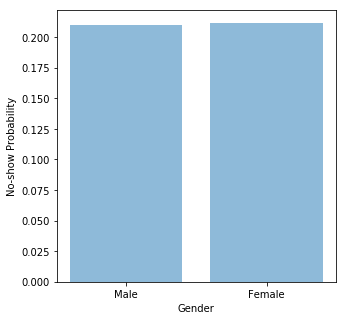

In [51]:
# Gender bar graph
X = ['Male','Female']
Y = []

stats = [[0,0],[0,0]]

for d in data_train:
    if d[2] == 'M':
        if d[13] == 'No':
            stats[0][1] += 1
        else:
            stats[0][0] += 1
    else:
        if d[13] == 'No':
            stats[1][1] += 1
        else:
            stats[1][0] += 1
            
Y.append((stats[0][0] + 0.0)/(stats[0][0] + stats[0][1]))
Y.append((stats[1][0] + 0.0)/(stats[1][0] + stats[1][1]))

makebar(X,Y,'Gender','No-show Probability')


In [34]:
# Time of day scatter plot (hourly)
# Can't be done, since all data about that was actually wiped
# Appointment Days all have 00:00:00 for their time

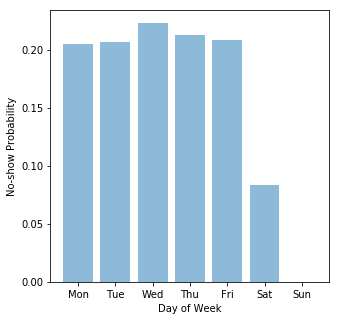

In [52]:
# Day of week bar graph
stats = []

for i in range(0,7):
    stats.append([0,0])

for d in data_train:
    if d[13] == 'No':
        stats[d[3].weekday()][1] += 1
    else:
        stats[d[3].weekday()][0] += 1

X = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
Y = []

for d in stats:
    noshow = d[0]
    show = d[1]
    
    if noshow == 0:
        Y.append(0)
    else:
        Y.append((noshow+0.0)/(show + noshow))
    
makebar(X,Y,'Day of Week','No-show Probability')





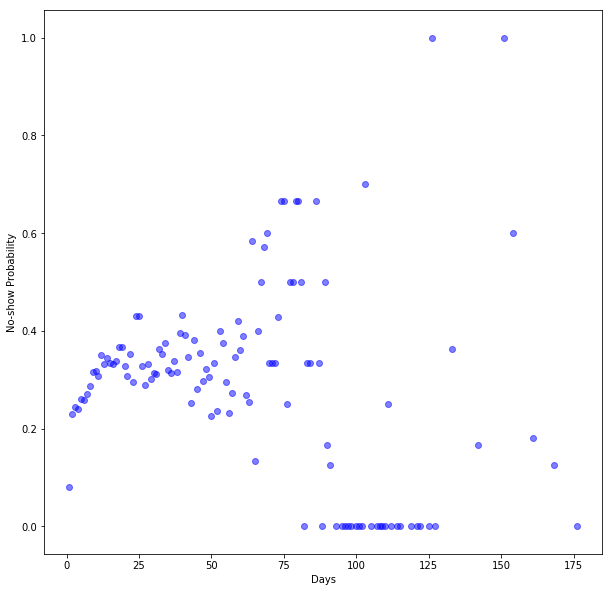

In [58]:
# Time between scheduling and appointment date scatter plot (daily)

# seconds in day
sid = 60 * 60 * 24

stats = {}

temp = 0

for d in data_train:
    temp = (d[4] - d[3]).total_seconds() / sid
    
    if temp <= 1:
        temp = 1
    else:
        temp = round(temp)
        
    if temp not in stats:
        stats[temp] = [0,0]
    if d[13] == 'No':
        stats[temp][1] += 1
    else:
        stats[temp][0] += 1

X = []
Y = []

for d in stats:
    noshow = stats[d][0]
    show = stats[d][1]
    
    X.append(d)
    Y.append((noshow+0.0)/(show + noshow))
    
makeplot(X,Y,'Days','No-show Probability')






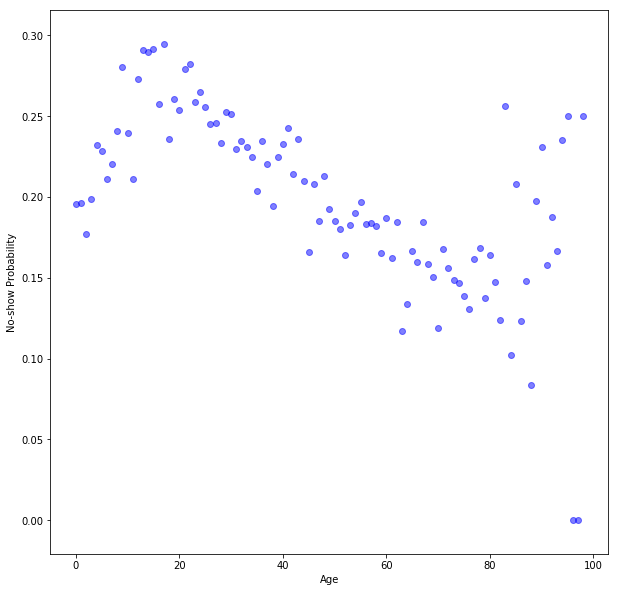

In [59]:
# Age scatter plot

ages = {}

for d in data_train:
    if d[5] not in ages:
        ages[d[5]] = [0,0]
    if d[13] == 'No':
        ages[d[5]][1] += 1
    else:
        ages[d[5]][0] += 1

X = []
Y = []

for d in ages:
    noshow = ages[d][0]
    show = ages[d][1]
    
    X.append(d)
    Y.append((noshow+0.0)/(show + noshow))
    
makeplot(X,Y,'Age','No-show Probability')

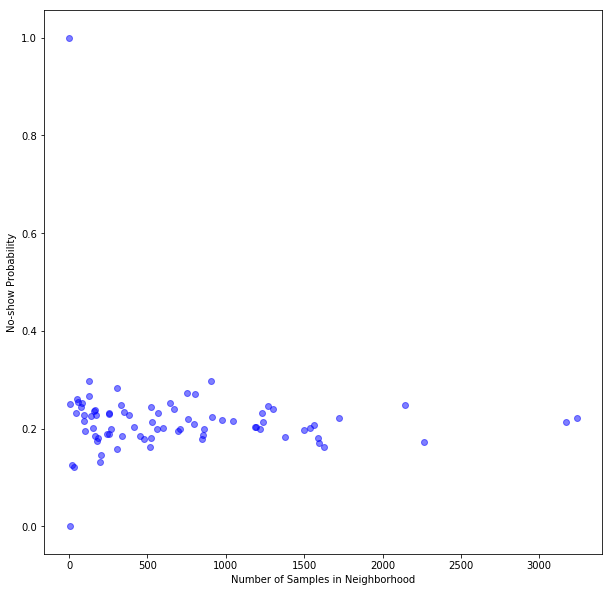

In [60]:
# Neighborhood scatter plot based on number of samples from each neighborhood

neighborhoods = {}

for d in data_train:
    if d[6] not in neighborhoods:
        neighborhoods[d[6]] = [0,0]
    if d[13] == 'No':
        neighborhoods[d[6]][1] += 1
    else:
        neighborhoods[d[6]][0] += 1

X = []
Y = []

for d in neighborhoods:
    noshow = neighborhoods[d][0]
    show = neighborhoods[d][1]
    
    X.append(show + noshow)
    Y.append((noshow+0.0)/(show + noshow))
    
makeplot(X,Y,'Number of Samples in Neighborhood','No-show Probability')

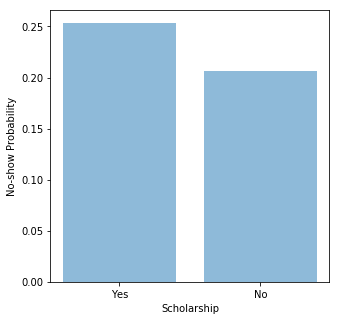

In [62]:
# Scholarship bar graph
X = ['Yes','No']
Y = []

stats = [[0,0],[0,0]]

for d in data_train:
    if d[7] == '1':
        if d[13] == 'No':
            stats[0][1] += 1
        else:
            stats[0][0] += 1
    else:
        if d[13] == 'No':
            stats[1][1] += 1
        else:
            stats[1][0] += 1
            
Y.append((stats[0][0] + 0.0)/(stats[0][0] + stats[0][1]))
Y.append((stats[1][0] + 0.0)/(stats[1][0] + stats[1][1]))

makebar(X,Y,'Scholarship','No-show Probability')

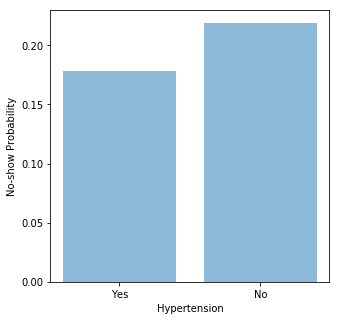

In [63]:
# Hipertension bar graph
X = ['Yes','No']
Y = []

stats = [[0,0],[0,0]]

for d in data_train:
    if d[8] == '1':
        if d[13] == 'No':
            stats[0][1] += 1
        else:
            stats[0][0] += 1
    else:
        if d[13] == 'No':
            stats[1][1] += 1
        else:
            stats[1][0] += 1
            
Y.append((stats[0][0] + 0.0)/(stats[0][0] + stats[0][1]))
Y.append((stats[1][0] + 0.0)/(stats[1][0] + stats[1][1]))

makebar(X,Y,'Hypertension','No-show Probability')

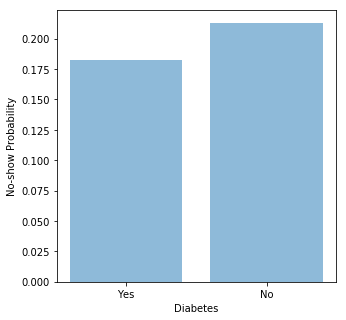

In [64]:
# Diabetes bar graph
X = ['Yes','No']
Y = []

stats = [[0,0],[0,0]]

for d in data_train:
    if d[9] == '1':
        if d[13] == 'No':
            stats[0][1] += 1
        else:
            stats[0][0] += 1
    else:
        if d[13] == 'No':
            stats[1][1] += 1
        else:
            stats[1][0] += 1
            
Y.append((stats[0][0] + 0.0)/(stats[0][0] + stats[0][1]))
Y.append((stats[1][0] + 0.0)/(stats[1][0] + stats[1][1]))

makebar(X,Y,'Diabetes','No-show Probability')

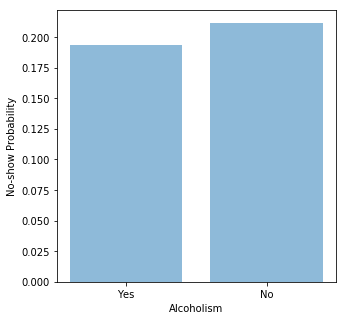

In [65]:
# Alcoholism bar graph
X = ['Yes','No']
Y = []

stats = [[0,0],[0,0]]

for d in data_train:
    if d[10] == '1':
        if d[13] == 'No':
            stats[0][1] += 1
        else:
            stats[0][0] += 1
    else:
        if d[13] == 'No':
            stats[1][1] += 1
        else:
            stats[1][0] += 1
            
Y.append((stats[0][0] + 0.0)/(stats[0][0] + stats[0][1]))
Y.append((stats[1][0] + 0.0)/(stats[1][0] + stats[1][1]))

makebar(X,Y,'Alcoholism','No-show Probability')

In [17]:
# Handcap bar graph

# First find out max number of handicaps
maximum = 0

for d in data_train:
    if int(d[11]) > maximum:
        maximum = int(d[11])
        
print (maximum)

3


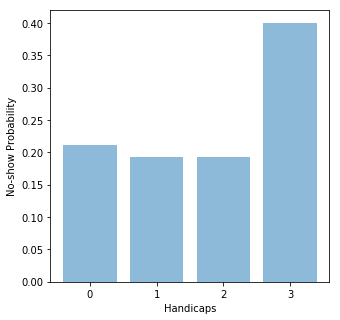

In [66]:
X = ['0','1','2','3']
Y = []

stats = [[0,0],[0,0],[0,0],[0,0]]

for d in data_train:
    if d[11] == '0':
        if d[13] == 'No':
            stats[0][1] += 1
        else:
            stats[0][0] += 1
    elif d[11] == '1':
        if d[13] == 'No':
            stats[1][1] += 1
        else:
            stats[1][0] += 1
    elif d[11] == '2':
        if d[13] == 'No':
            stats[2][1] += 1
        else:
            stats[2][0] += 1
    else:
        if d[13] == 'No':
            stats[3][1] += 1
        else:
            stats[3][0] += 1
            
Y.append((stats[0][0] + 0.0)/(stats[0][0] + stats[0][1]))
Y.append((stats[1][0] + 0.0)/(stats[1][0] + stats[1][1]))
Y.append((stats[2][0] + 0.0)/(stats[2][0] + stats[2][1]))
Y.append((stats[3][0] + 0.0)/(stats[3][0] + stats[3][1]))

makebar(X,Y,'Handicaps','No-show Probability')

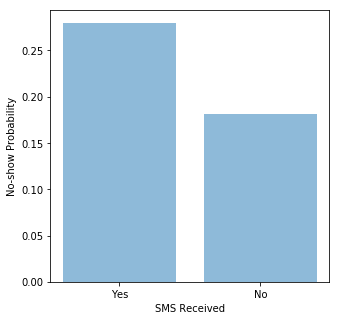

In [67]:
# SMS_received bar graph
X = ['Yes','No']
Y = []

stats = [[0,0],[0,0]]

for d in data_train:
    if d[12] == '1':
        if d[13] == 'No':
            stats[0][1] += 1
        else:
            stats[0][0] += 1
    else:
        if d[13] == 'No':
            stats[1][1] += 1
        else:
            stats[1][0] += 1
            
Y.append((stats[0][0] + 0.0)/(stats[0][0] + stats[0][1]))
Y.append((stats[1][0] + 0.0)/(stats[1][0] + stats[1][1]))

makebar(X,Y,'SMS Received','No-show Probability')

In [20]:
# Looking at how much data on individual IDs there is

uniqueID = {}

for d in data_train:
    if d[0] not in uniqueID:
        uniqueID[d[0]] = 1
    else:
        uniqueID[d[0]] += 1

In [71]:
total = 0
max = 0

for d in uniqueID:
    if uniqueID[d] > max:
        max = uniqueID[d]
    if uniqueID[d] == 1:
        #print (d + ": " + str(uniqueID[d]))
        total += 1
        
print (total)
print (len(uniqueID))

print (max)

25339
35952
65


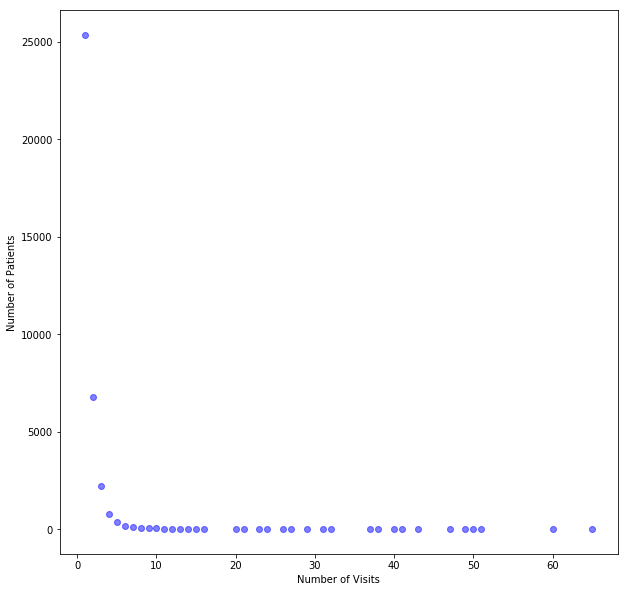

In [69]:
visits = {}

for d in uniqueID:
    if uniqueID[d] not in visits:
        visits[uniqueID[d]] = 1
    else:
        visits[uniqueID[d]] += 1

X = []
Y = []

for d in visits:
    X.append(d)
    Y.append(visits[d])
    
makeplot(X,Y,'Number of Visits','Number of Patients')


